<a href="https://colab.research.google.com/github/simone-caccialanza/Stack-Overflow-survey-visualization/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.font_manager import FontProperties
import seaborn as sns

In [3]:
CWD = '/content/drive/MyDrive/Data visualization/Dataset_Stackoverflow'
df_2020 = pd.read_csv(os.path.join(CWD,'survey_results_public_2020.csv'))
df_2019 = pd.read_csv(os.path.join(CWD,'survey_results_public_2019.csv'))
df_2018 = pd.read_csv(os.path.join(CWD,'survey_results_public_2018.csv'))
df_2017 = pd.read_csv(os.path.join(CWD,'survey_results_public_2017.csv'))
df_2016 = pd.read_csv(os.path.join(CWD,'survey_results_public_2016.csv'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
def fix_labels (l):
  if 'HTML' in l and 'CSS' in l:
    l.remove('HTML')
    l.remove('CSS')
    l.append('HTML/CSS')
  elif 'HTML' in l:
    l.remove('HTML')
    l.append('HTML/CSS')
  elif 'CSS' in l:
    l.remove('CSS')
    l.append('HTML/CSS')
  if 'Bash/Shell/PowerShell' in l:
    l.remove('Bash/Shell/PowerShell')
    l.append('Bash/Shell')
  
  return l

### Languages

In [5]:
df_lang_list = []
df_lang_list.append(df_2016['tech_do'].dropna())
df_lang_list.append(df_2017['HaveWorkedLanguage'].dropna())
df_lang_list.append(df_2018['LanguageWorkedWith'].dropna())
df_lang_list.append(df_2019['LanguageWorkedWith'].dropna())
df_lang_list.append(df_2020['LanguageWorkedWith'].dropna())

In [6]:

languages_to_plot = []
for df_lang in df_lang_list:
  languages = {}
  tot = 0
  for value in df_lang:
    keys = value.replace(" ", "").split(";")
    keys = fix_labels(keys)
    for key in keys:
      if key not in languages:
        languages[key] = 1
      else: languages[key] += 1
  languages_to_plot.append(languages)

for i in range(len(languages_to_plot)):
  languages_to_plot[i] = dict(sorted(languages_to_plot[i].items(), key=lambda item: item[1]))

#### Heat

In [7]:
all_keys = []
for i in range(len(languages_to_plot)):
  all_keys.extend(list(languages_to_plot[i].keys()))
all_keys = list(set(all_keys))

In [8]:
match_matrix = np.zeros(shape=(5,len(all_keys)),dtype=int)
for i in range(len(languages_to_plot)):
  for key in languages_to_plot[i]:
    if key in all_keys:
      match_matrix[i,all_keys.index(key)] = 1

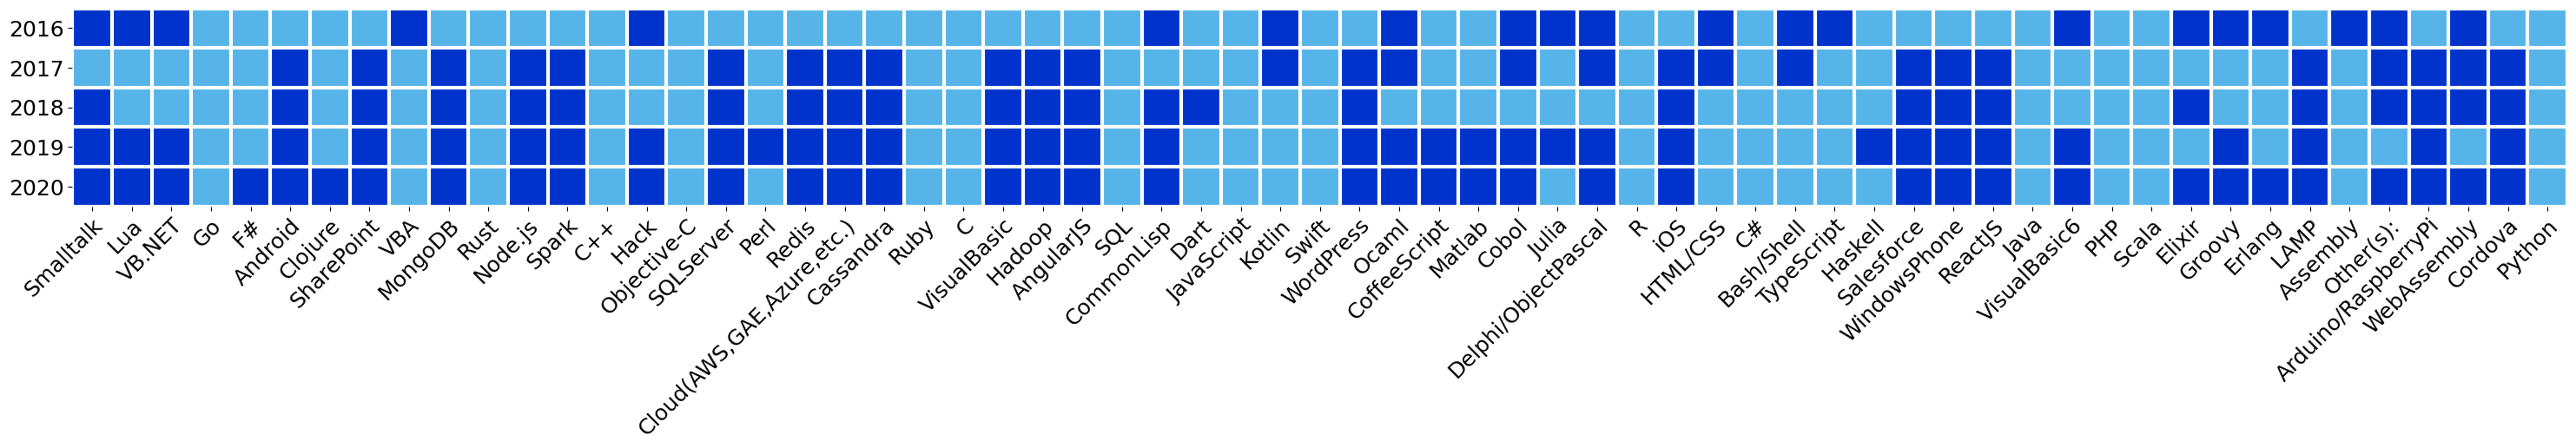

In [9]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

years = ['2016','2017','2018','2019','2020']


font = {'size': 18}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=[30,10])

im = ax.imshow(match_matrix,cmap=matplotlib.colors.ListedColormap(["#0033cc", "#56B4E9"]))

ax.set_xticks(np.arange(len(all_keys)))
ax.set_yticks(np.arange(len(years)))

ax.set_xticklabels(all_keys)
ax.set_yticklabels(years)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks(np.arange(match_matrix.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(match_matrix.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.grid(which="major", b=False)
ax.tick_params(which="minor", bottom=False, left=False)

# ax.set_title("Programming languages matches")
fig.tight_layout()
plt.show()

#### Line


In [10]:
import matplotlib.pyplot as plt


matplotlib.rcParams.update(matplotlib.rcParamsDefault)

colors = ['#CC79A7','#0072B2','#009E73','#56B4E9','#D55E00','#E69F00','#F0E442','#000000']

line_languages = {}
for i,col in enumerate(match_matrix.T):
  if col.all():
    line_languages[all_keys[i]] = []
    for j in range(len(languages_to_plot)):
      line_languages[all_keys[i]].append(languages_to_plot[j][all_keys[i]]*100/len(df_lang_list[j]))



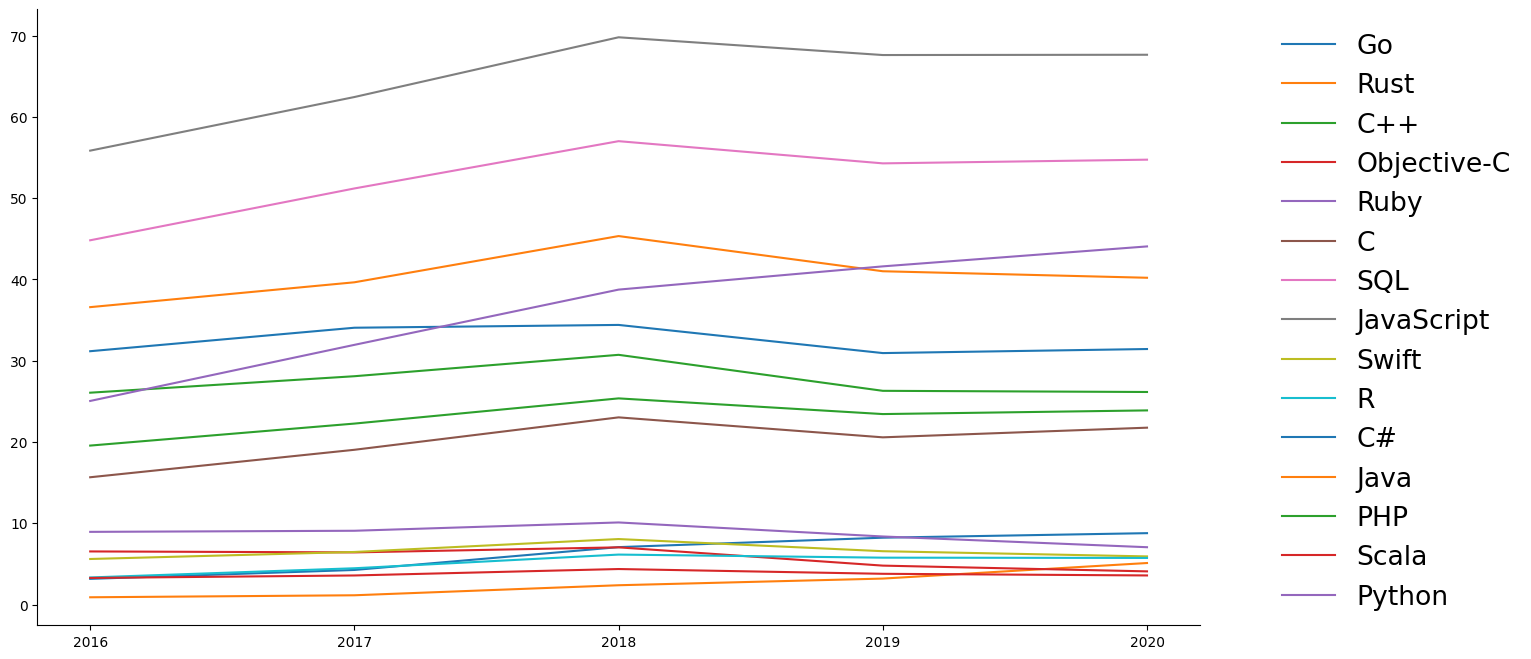

In [11]:
fig, ax = plt.subplots(figsize=[15,8])

font = {'size': 16}
plt.rc('font', **font)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


fontP = FontProperties()
fontP.set_size('large')

lines = []
for key in line_languages:
  line, = plt.plot(years, line_languages[key], label=key)
  lines.append(line)


plt.legend(handles=lines, bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP, frameon=False)
plt.show()

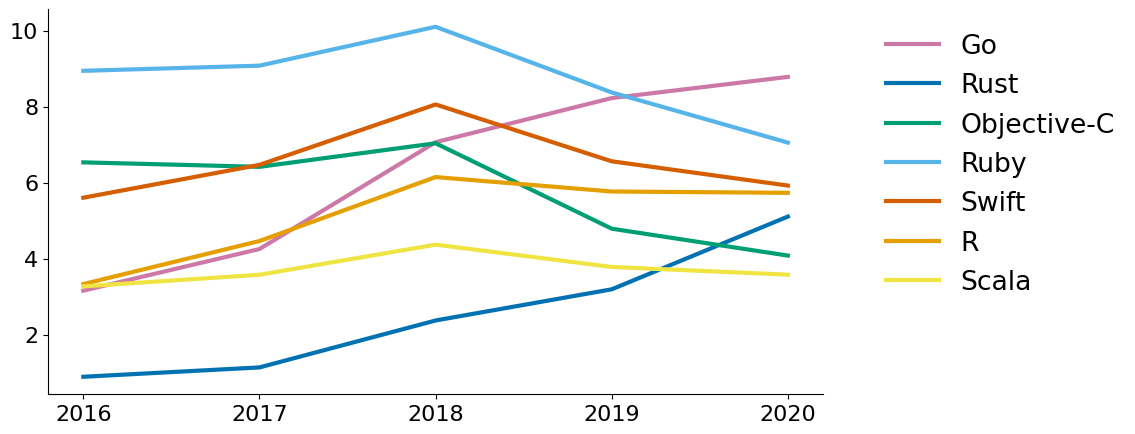

In [12]:
fig, ax = plt.subplots(figsize=[10,5])

font = {'size': 16}
plt.rc('font', **font)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fontP = FontProperties()
fontP.set_size('large')

lines = []
i=0
for key in line_languages:
  if line_languages[key][0] < 15:
    line, = plt.plot(years, line_languages[key], label=key, linewidth=3, color=colors[i])
    lines.append(line)
    i+=1

plt.legend(handles=lines, bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP, frameon=False)
plt.show()

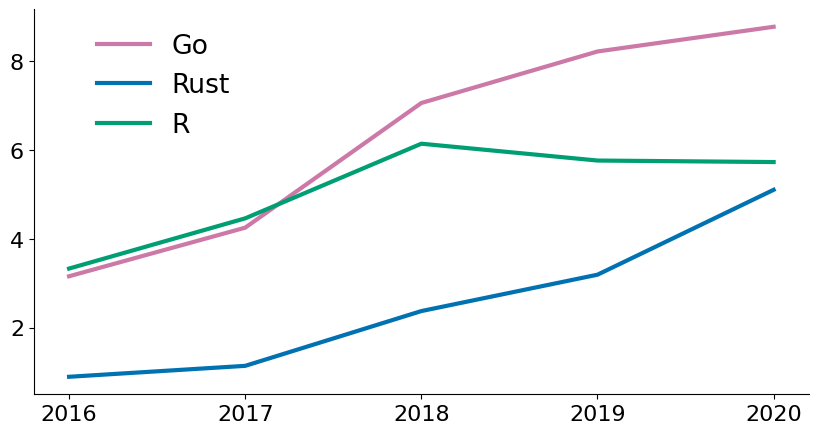

In [13]:
fig, ax = plt.subplots(figsize=[10,5])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

font = {'size': 16}
plt.rc('font', **font)

fontP = FontProperties()
fontP.set_size('large')

lines = []
i=0
for key in line_languages:
  if line_languages[key][0] < 15 and line_languages[key][4] > line_languages[key][0]*1.1:
    line, = plt.plot(years, line_languages[key], label=key, linewidth=3, color=colors[i])
    lines.append(line)
    i+=1

plt.legend(handles=lines, bbox_to_anchor=(0.05, 1), loc='upper left', prop=fontP, frameon=False)
plt.show()

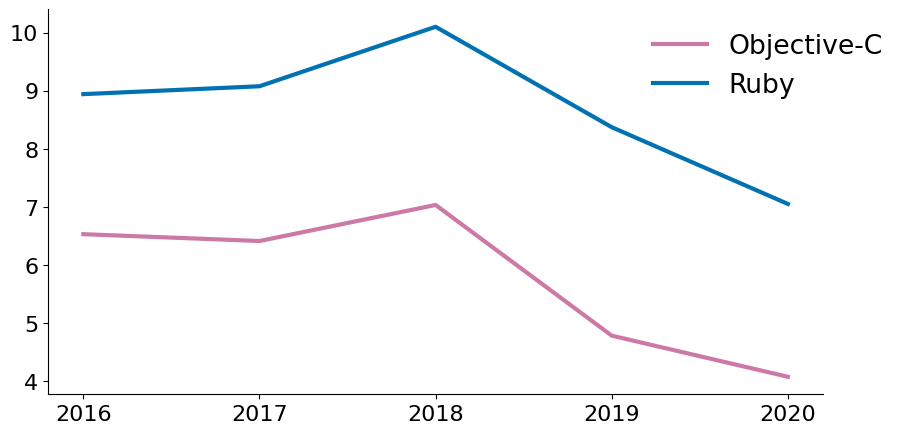

In [14]:
fig, ax = plt.subplots(figsize=[10,5])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

font = {'size': 16}
plt.rc('font', **font)

fontP = FontProperties()
fontP.set_size('large')

lines = []
i=0
for key in line_languages:
  if line_languages[key][0] < 15 and line_languages[key][0] > line_languages[key][4]*1.1:
    line, = plt.plot(years, line_languages[key], label=key, linewidth=3, color=colors[i])
    lines.append(line)
    i+=1

plt.legend(handles=lines, bbox_to_anchor=(0.75, 1), loc='upper left', prop=fontP, frameon=False)
plt.show()

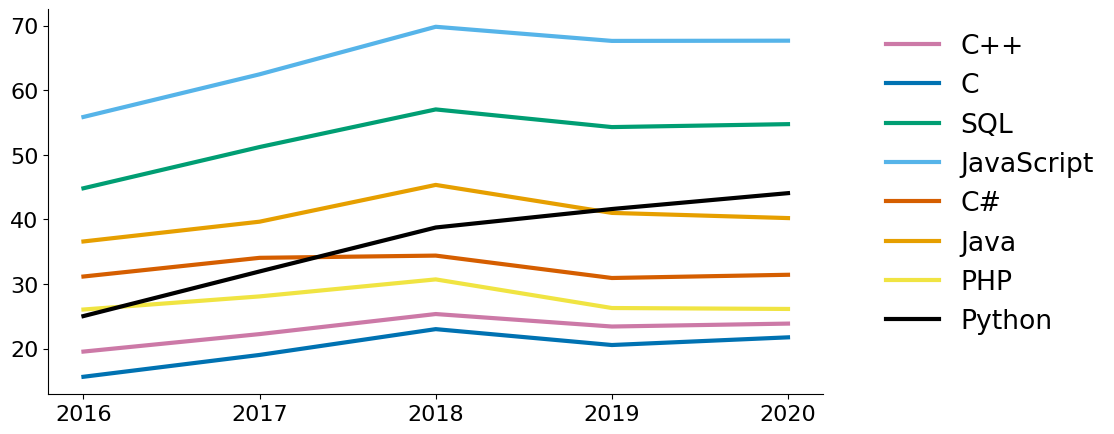

In [15]:
fig, ax = plt.subplots(figsize=[10,5])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

font = {'size': 16}
plt.rc('font', **font)

fontP = FontProperties()
fontP.set_size('large')

lines = []
i=0
for key in line_languages:
  if line_languages[key][0] > 15:
    line, = plt.plot(years, line_languages[key], label=key, linewidth=3, color=colors[i])
    lines.append(line)
    i+=1

plt.legend(handles=lines, bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP, frameon=False)
plt.show()

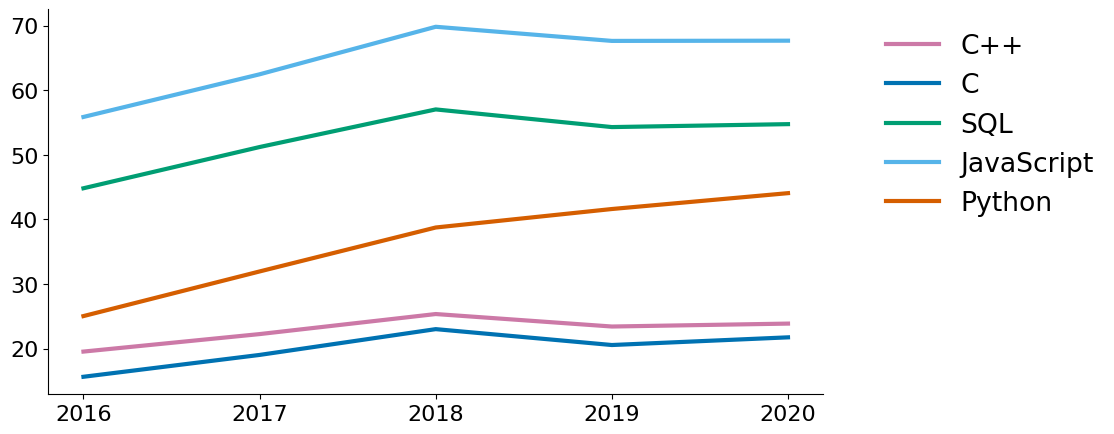

In [16]:
fig, ax = plt.subplots(figsize=[10,5])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

font = {'size': 16}
plt.rc('font', **font)

fontP = FontProperties()
fontP.set_size('large')



lines = []
i=0
for key in line_languages:
  if line_languages[key][0] > 15 and line_languages[key][4] > line_languages[key][0]*1.1:
    line, = plt.plot(years, line_languages[key], label=key, linewidth=3, color=colors[i])
    lines.append(line)
    i+=1

plt.legend(handles=lines, bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP, frameon=False)
plt.show()

### Salary per EdLevel

In [48]:
df = pd.read_csv(os.path.join(CWD,'survey_results_public_2020.csv'))
df.dropna(subset=['EdLevel'], inplace = True)
df.dropna(subset=['ConvertedComp'], inplace = True)

replace_dict = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':'Bachelor',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':'Master',
    'Some college/university study without earning a degree':'College study',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary',
    'Associate degree (A.A., A.S., etc.)':'Associate',
    'Professional degree (JD, MD, etc.)':'Professional',
    'Other doctoral degree (Ph.D., Ed.D., etc.)':'Doctoral',
    'Primary/elementary school':'Primary',
    'I never completed any formal education':'No formal education'
}



#### Salary

In [49]:
plt.rcParams['axes.facecolor']= 'white'
sns.set(rc={'figure.figsize':(15,10)})
plt.rcParams['axes.facecolor']= 'white'

df=df.rename(columns={"ConvertedComp": "Salary"})

box = sns.boxplot( x=df['EdLevel'].map(replace_dict), y=df["Salary"], notch=True, color='#56B4E9')
ylabels = ['{:.0f}'.format(x)+'k' for x in box.get_yticks()/1000]
_ = box.set_yticklabels(ylabels)

In [ ]:
# df['EdLevel'].map(replace_dict)
plt.ylim(100, 150000)
sns.set(rc={'figure.figsize':(10,3)})
plt.rcParams['axes.facecolor']= 'white'
df1 = df.loc[df['EdLevel'].isin(['Some college/university study without earning a degree','Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Other doctoral degree (Ph.D., Ed.D., etc.)'])]

sns.boxplot( x=df1['EdLevel'].map(replace_dict), y=df1["Salary"], notch=True, color='#56B4E9', width=0.5)


#### Satisfaction

In [60]:
df = pd.read_csv(os.path.join(CWD,'survey_results_public_2020.csv'))
df = df.loc[df['EdLevel'].isin(['Some college/university study without earning a degree','Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Other doctoral degree (Ph.D., Ed.D., etc.)'])]
df = df.dropna(subset=['JobSat'])
college_jobsat = df['JobSat']
color_map = ['#E69F00','#D55E00','#F0E442','#56B4E9','#CC79A7']

In [64]:
df_college_jobsat = df.loc[df['EdLevel'] == 'Some college/university study without earning a degree']['JobSat']
dict_college_jobsat = {}
for key in college_jobsat.unique():
  dict_college_jobsat[key] = 0
for key in df_college_jobsat:
  dict_college_jobsat[key] += 1

dict_college_jobsat = dict(sorted(dict_college_jobsat.items(), key=lambda item: item[0]))

font = {'size': 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1,1,figsize=[10,6])
ax.set_title('College study')
_ = ax.pie(x=list(dict_college_jobsat.values()),
       autopct="%.1f%%", 
       explode=[0.05]*len(dict_college_jobsat.values()),
       labels=['','','','',''],
       pctdistance=0.5,
       colors=color_map,
       startangle=0)

In [53]:
df_college_jobsat = df.loc[df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)']['JobSat']
dict_college_jobsat = {}
for key in college_jobsat.unique():
  dict_college_jobsat[key] = 0
for key in df_college_jobsat:
  dict_college_jobsat[key] += 1

dict_college_jobsat = dict(sorted(dict_college_jobsat.items(), key=lambda item: item[0]))

font = {'size': 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1,1,figsize=[10,6])
ax.set_title('Bachelor’s degree')
_ = ax.pie(x=list(dict_college_jobsat.values()),
       autopct="%.1f%%", 
       explode=[0.05]*len(dict_college_jobsat.values()),
       labels=['','','','',''],
       pctdistance=0.5,
       colors=color_map,
       startangle=0)

In [45]:
df_college_jobsat = df.loc[df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)']['JobSat']
dict_college_jobsat = {}
for key in college_jobsat.unique():
  dict_college_jobsat[key] = 0
for key in df_college_jobsat:
  dict_college_jobsat[key] += 1

dict_college_jobsat = dict(sorted(dict_college_jobsat.items(), key=lambda item: item[0]))

font = {'size': 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1,1,figsize=[10,6])
ax.set_title('Master’s degree')
_ = ax.pie(x=list(dict_college_jobsat.values()),
       autopct="%.1f%%", 
       explode=[0.05]*len(dict_college_jobsat.values()),
       labels=['','','','',''],
       pctdistance=0.5,
       colors=color_map,
       startangle=0)

In [46]:
df_college_jobsat = df.loc[df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)']['JobSat']
dict_college_jobsat = {}
for key in college_jobsat.unique():
  dict_college_jobsat[key] = 0
for key in df_college_jobsat:
  dict_college_jobsat[key] += 1

dict_college_jobsat = dict(sorted(dict_college_jobsat.items(), key=lambda item: item[0]))

font = {'size': 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1,1,figsize=[10,6])
ax.set_title('Other doctoral degree')
_ = ax.pie(x=list(dict_college_jobsat.values()),
       autopct="%.1f%%", 
       explode=[0.05]*len(dict_college_jobsat.values()),
       labels=['','','','',''],
       pctdistance=0.5,
       colors=color_map,
       startangle=0)

### Salary per Country

In [25]:
# df = df.replace('United States','United States of America')
df_2020 = df_2020.replace('Russian Federation','Russia')

df_country = df_2020.groupby(['Country'])

df_mean = df_country['ConvertedComp'].mean()
_ = df_mean.to_dict()

In [26]:
barx = df_mean.keys()
bary = df_mean.values.tolist()
df_bar = pd.DataFrame(data={'Country':barx,'Salary':bary})


In [27]:
country_mask = [
  'Italy',
  'Spain',
  'France',
  'Portugal',
  'Germany',
  'Poland',
  'United Kingdom',
  'Albania',
  'Bulgaria',
  'Croatia',
  'Austria',
  'Czech Republic',
  'Denmark',
  'Estonia',
  'Finland',
  'Georgia ',
  'Greece',
  'Hungary',
  'Iceland',
  'Ireland',
  'Lithuania',
  'Luxembourg',
  'Malta',
  'Netherlands ',
  'Norway',
  'Romania',
  'Russia',
  'Slovenia',
  'Sweden',
  'Switzerland',
  'Turkey'
]
df_bar = df_bar.loc[df_bar['Country'].isin(country_mask)]

In [28]:
df_bar.sort_values(by='Salary', axis=0, ascending=True, inplace=True)

In [29]:
font = {'size': 16}
plt.rc('font', **font)
plt.rcParams['axes.facecolor']= 'white'
plt.rcParams['figure.figsize']= [10,10]

plt.barh(df_bar.tail(20)['Country'].to_list(), df_bar.tail(20)['Salary'].to_list(), color='#56B4E9')


<BarContainer object of 20 artists>

In [30]:
bigmac_index = {
  'Italy':68.95,
  'Spain':55.27,
  'France':76.34,
  'Portugal':49.52,
  'Germany':66.34,
  'Poland':39.46,
  'United Kingdom':65.67,
  'Albania':36.96,
  'Bulgaria':38.39,
  'Croatia':56.31,
  'Austria':71.78,
  'Czech Republic':45.05,
  'Denmark':85.02,
  'Estonia':52.93,
  'Finland':72.71,
  'Georgia ':29.71,
  'Greece':57.50,
  'Hungary':40.09,
  'Iceland':90.19,
  'Ireland':78.07,
  'Lithuania':44.85,
  'Luxembourg':84.38,
  'Malta':69.26,
  'Netherlands ':74.63,
  'Norway':96.80,
  'Romania':36.23,
  'Russia':33.66,
  'Slovenia':55.17,
  'Sweden':72.31,
  'Switzerland':125.69,
  'Turkey':32.44
}
for key in bigmac_index:
  df_bar.loc[df_bar['Country'] == key,'Salary'] /= bigmac_index[key]

df_bar = df_bar.rename(columns={"Salary": "Salary/Life-Cost"})

In [31]:
plt.rcParams['axes.facecolor']= 'white'
plt.rcParams['figure.figsize']= [10,10]
plt.barh(df_bar.tail(20)['Country'].to_list(), df_bar.tail(20)['Salary/Life-Cost'].to_list(), color='#56B4E9')

<BarContainer object of 20 artists>

In [32]:
df_bar.sort_values(by='Salary/Life-Cost', axis=0, ascending=True, inplace=True)

In [33]:
plt.rcParams['axes.facecolor']= 'white'
plt.rcParams['figure.figsize']= [10,10]
plt.barh(df_bar.tail(20)['Country'].to_list(), df_bar.tail(20)['Salary/Life-Cost'].to_list(), color='#56B4E9')

<BarContainer object of 20 artists>

### Languages graph

In [34]:
lang_2020 = df_2020['LanguageWorkedWith'].dropna()

In [35]:
all_keys = []
for value in lang_2020:
  keys = value.replace(" ", "").split(";")
  keys = fix_labels(keys)
  for key in keys:
    all_keys.append(key)
all_keys = list(set(all_keys))
all_keys.sort()

In [36]:
graph = {}
for key1 in all_keys:
  graph[key1] = {}
  for key2 in all_keys:
    graph[key1][key2] = 0

In [37]:
for value in lang_2020:
  answers = value.replace(" ", "").split(";")
  answers = fix_labels(answers)
  for i in range(len(answers)):
    for j in range(i,len(answers)):
      if answers[i] in all_keys and answers[j] in all_keys:
        graph[answers[i]][answers[j]] += 1

In [38]:
for i in range(len(all_keys)):
  for j in range(i,len(all_keys)):
    if i != j:
      graph[all_keys[i]][all_keys[j]] += graph[all_keys[j]][all_keys[i]]

In [39]:
import networkx as nx
G = nx.Graph()

for node in all_keys:
  G.add_node(node)

for i in range(len(all_keys)):
  for j in range(i,len(all_keys)):
    if i!=j and graph[all_keys[i]][all_keys[j]] > 0:
      G.add_edge(all_keys[i],all_keys[j], weight=graph[all_keys[i]][all_keys[j]])

In [40]:

plt.rcParams['figure.figsize']= [20,10]
font = {'size': 13}
plt.rc('font', **font)

edges = G.edges()
weights = [G[u][v]['weight']/500 for u,v in edges]

nx.draw(G, with_labels=True, font_weight='light', node_size=2500, node_color='#56B4E9',edge_color='#adc2eb', width=weights)

In [41]:
import plotly.figure_factory as ff

n_answers = len(df_2020['LanguageWorkedWith'].dropna())
X = nx.to_numpy_matrix(G)
for i in range(len(X)):
    X[i,i] = 1
X = 1/X
for i in range(len(X)):
    X[i,i] = 0


fig = ff.create_dendrogram(X, orientation='left', labels=all_keys, color_threshold=1)


fig.update_layout(width=800, height=800)
fig.show()